<a href="https://colab.research.google.com/github/Beatrix-droid/pytorch-tutorial/blob/master/pytorch_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Pytorch
```
# This is formatted as code
```



creating a tensor

In [1]:
#creating a tensor:
import torch

x = torch.empty(2,2) # a 2d tensor
print(x)

tensor([[1.0729e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00]])


can sue teh rand ne==method to create a tensor with random numbers

In [2]:
#can create tensors from lists as well:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [3]:
#can add tensors as you would normal add ints or concat strings

#can also add one tensor to another:
x = torch.rand(2,2)
y = torch.rand(2,2)
y.add_(x) #add tensor x to y. By defualt any function with a trailing underscore in pytorch will be an inplace operation


#can also divide and multiplu as one normally woukld

tensor([[0.5539, 1.3596],
        [1.3558, 0.5506]])

converting a tensor to a numpy array

In [4]:
import numpy as np

a=torch.ones(5) #a 1d tensor of len 5 full of ones
b = a.numpy() #conver to array
print(a)
print(type(b))
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]


converting an array to a tensor

In [5]:
a= np.ones(5) #instantiate the array
b=torch.from_numpy(a) #convert the arary to a pytorch tensor
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


check if you have a cuda toolkit avaialble to do operations on the gpu

In [6]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  x= torch.ones(5, device=device)
  y=torch.ones(5)
  y=y.to(device) #create and move tensors to gpu
#if you now try to use numpy n calling  
  x.numpy()
  #you will get an error because numpy can only handle 
  #cpu tensors so we would have to move it back to the cpu
  x=x.to('cpu')
  

grad = true
when creatinga  tensor in pytorch we can set an optional parameter to True: requires_grad=True  This tells pytorch that it will have to calculate teh gradient of the tensor later on in the computation

In [7]:
x = torch.ones(5, requires_grad=True)

# Autograd Pytorch
calculate gradients to optimize models

In [8]:
x = torch.rand(3)
print(x)

tensor([0.3228, 0.8454, 0.5747])


In [9]:
#say we need ot calculate the gradient of a functionat that point.
#we set requires_grad=True:
x = torch.rand(3, requires_grad=True)



In [10]:
#now do an operation:
y = x+2
print(y) #operation was addition so the grad_funct was add
z = y*y*2
print(z)#operation was mult so the grad_funct was mult
z=z.mean()

tensor([2.3048, 2.2649, 2.5465], grad_fn=<AddBackward0>)
tensor([10.6244, 10.2591, 12.9688], grad_fn=<MulBackward0>)


now when we want to calculate the gradients the only thing that we need to do is call the .backward() method:

In [11]:
z.backward()# will calculate the gradient of z with respect to x so dz/dx

In [12]:
#now x has a grad attribute with teh gradients stored that we can use:

print(x.grad)

tensor([3.0731, 3.0198, 3.3953])


In this case z was a scalar (as z =z.mean()) so we could just implciitly call the backward function on it.

the backward function is based on the chain rule  (jacobain matrix)(vector) = (gradients we are interested in
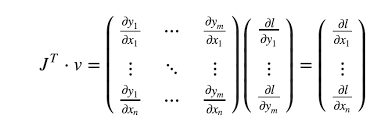


in general if z is a vector you need to pass the value f the vector in the function.Say we had something like:
```
v= torch.tensor([0.1. 1.0, 0.001],dtype=torch.float32)
z = y*y*2 #z is now a bector
z.backward(v)
# This is formatted as code
```



#preventing Pytorch from tracking the history
 (useful when updating weights of a model)

 We have three options on how to do this:
 
 ```
 1) x.requres_grad_(False)
 2) x.detach()
 3) with torch.no_grad():
 ```

In [13]:
#method 1
x.requires_grad_(False)

tensor([0.3048, 0.2649, 0.5465])

In [14]:
#method 2
y = x.detach() #creates a new tensor with teh same values but no gradient
print(y)

tensor([0.3048, 0.2649, 0.5465])


In [15]:
#method 3
with torch.no_grad():
  y = x+2
print(y)

tensor([2.3048, 2.2649, 2.5465])


warning, whenever we call the backward  function then the gradient for the tensors will be accumulated and summed up in the .grad attribute:

In [16]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [17]:
#for the second one the gradients are incorrect. they have neen usmmed up hence 6

#must clear the weights each time:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)
  weights.grad.zero_()#this is the important line

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


#Gradient Descent and constructing a basic pipeline for pytorch
let's see how to optimize paarameters from scracth by using a linear regression model that we will code from scratch

In [18]:
# f = w+x
import numpy as np


X=np.array([1,2,3,4], dtype=np.float32)
Y=np.array([2,4,6,8], dtype=np.float32)

w=0.0

In [19]:
#model prediction
def forward(x):
  return w * x


#least square residual loss function
def loss(y, y_predicted):
  return((y_predicted -y)**2).mean()

#gradient
#MSE = 1/n *(wx-y)^2 formual for mean squared error
#dj/dw = 1/N 2x(wx-y)
#implement this fromulka in the gradient: y_predicted= y_predicted
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean() #mean as dividing by n in formula


In [20]:
print(f"prediction before training: f(5)={forward(5)}")

prediction before training: f(5)=0.0


In [21]:
#training
learning_rate = 0.01
n_iters=10

for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  dw=gradient(X,Y, y_pred)

  #update weights
  w=w-learning_rate *dw

  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=1.2, loss = 30.0
prediction after trainingf(5)=6.0
epoch 2: W=1.6799999618530272, loss = 4.799999237060547
prediction after trainingf(5)=8.399999809265136
epoch 3: W=1.871999988555908, loss = 0.7680001854896545
prediction after trainingf(5)=9.35999994277954
epoch 4: W=1.9487999868392942, loss = 0.1228799968957901
prediction after trainingf(5)=9.743999934196472
epoch 5: W=1.9795200133323667, loss = 0.019660834223031998
prediction after trainingf(5)=9.897600066661834
epoch 6: W=1.9918080282211301, loss = 0.0031457357108592987
prediction after trainingf(5)=9.95904014110565
epoch 7: W=1.9967231869697568, loss = 0.0005033080233260989
prediction after trainingf(5)=9.983615934848784
epoch 8: W=1.99868928194046, loss = 8.053186320466921e-05
prediction after trainingf(5)=9.993446409702301
epoch 9: W=1.999475698471069, loss = 1.2884394891443662e-05
prediction after trainingf(5)=9.997378492355345
epoch 10: W=1.999790253639221, loss = 2.0613531432900345e-06
prediction after trainingf(5)

we did the computation of weights manually
now lets do the same thing with pytorch. No need for numpy arrays, will use Pytorch tensors

In [22]:
import torch
X=torch.tensor([1,2,3,4], dtype=torch.float32, requires_grad=True)
Y=torch.tensor([2,4,6,8], dtype=torch.float32,  requires_grad=True)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

In [23]:
#model prediction
def forward(x):
  return w * x


#least square residual loss function
def loss(y, y_predicted):
  return((y_predicted -y)**2).mean()

#gradient
#MSE = 1/n *(wx-y)^2 formual for mean squared error
#dj/dw = 1/N 2x(wx-y)
#implement this fromulka in the gradient: y_predicted= y_predicted
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted-y).mean() #mean as dividing by n in formula

In [24]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  with torch.no_grad():
    w-= learning_rate * w.grad

  w.grad.zero_()  
  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=0.29999998211860657, loss = 30.0
prediction after trainingf(5)=1.4999998807907104
epoch 2: W=0.5549999475479126, loss = 21.674999237060547
prediction after trainingf(5)=2.7749996185302734
epoch 3: W=0.7717499136924744, loss = 15.660187721252441
prediction after trainingf(5)=3.8587496280670166
epoch 4: W=0.9559874534606934, loss = 11.314486503601074
prediction after trainingf(5)=4.779937267303467
epoch 5: W=1.1125893592834473, loss = 8.17471694946289
prediction after trainingf(5)=5.562946796417236
epoch 6: W=1.2457009553909302, loss = 5.9062323570251465
prediction after trainingf(5)=6.228504657745361
epoch 7: W=1.358845829963684, loss = 4.2672529220581055
prediction after trainingf(5)=6.794229030609131
epoch 8: W=1.4550189971923828, loss = 3.083089828491211
prediction after trainingf(5)=7.275094985961914
epoch 9: W=1.5367661714553833, loss = 2.227532148361206
prediction after trainingf(5)=7.683830738067627
epoch 10: W=1.6062512397766113, loss = 1.609391689300537
prediction af

In [25]:
import torch.nn as nn
loss=nn.MSELoss()
optimizer=torch.optim.SGD([w], lr=learning_rate)

replacing the optimizers and the loss function

In [26]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={forward(5)}")

epoch 1: W=1.6653136014938354, loss = 1.1627856492996216
prediction after trainingf(5)=8.326567649841309
epoch 2: W=1.7155165672302246, loss = 0.8401124477386475
prediction after trainingf(5)=8.577583312988281
epoch 3: W=1.758189082145691, loss = 0.6069811582565308
prediction after trainingf(5)=8.790945053100586
epoch 4: W=1.7944607734680176, loss = 0.4385439455509186
prediction after trainingf(5)=8.97230339050293
epoch 5: W=1.825291633605957, loss = 0.3168478012084961
prediction after trainingf(5)=9.126458168029785
epoch 6: W=1.8514978885650635, loss = 0.22892260551452637
prediction after trainingf(5)=9.257489204406738
epoch 7: W=1.873773217201233, loss = 0.1653965264558792
prediction after trainingf(5)=9.368865966796875
epoch 8: W=1.8927072286605835, loss = 0.11949898302555084
prediction after trainingf(5)=9.463536262512207
epoch 9: W=1.9088011980056763, loss = 0.08633805811405182
prediction after trainingf(5)=9.54400634765625
epoch 10: W=1.9224810600280762, loss = 0.0623791441321373

replacing the forward function

In [27]:
#this is where we would define the model
X=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32, requires_grad=True)
Y=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32,  requires_grad=True)
X_test= torch.tensor([5], dtype=torch.float32)


n_samples, n_features = X.shape
imput_size = n_features
output_size = n_features
model = nn.Linear(imput_size, output_size)

In [28]:
loss=nn.MSELoss()
#updates the weights
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)


In [29]:
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    [w,b]=model.parameters()
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={model(X_test).item()}")

epoch 1: W=Parameter containing:
tensor([[0.4375]], requires_grad=True), loss = 0.0450688973069191
prediction after trainingf(5)=2.5820541381835938
epoch 2: W=Parameter containing:
tensor([[0.6719]], requires_grad=True), loss = 18.310523986816406
prediction after trainingf(5)=3.7539281845092773
epoch 3: W=Parameter containing:
tensor([[0.8711]], requires_grad=True), loss = 13.229354858398438
prediction after trainingf(5)=4.750021457672119
epoch 4: W=Parameter containing:
tensor([[1.0404]], requires_grad=True), loss = 9.558207511901855
prediction after trainingf(5)=5.596700191497803
epoch 5: W=Parameter containing:
tensor([[1.1844]], requires_grad=True), loss = 6.905806541442871
prediction after trainingf(5)=6.316377639770508
epoch 6: W=Parameter containing:
tensor([[1.3067]], requires_grad=True), loss = 4.989445686340332
prediction after trainingf(5)=6.928103446960449
epoch 7: W=Parameter containing:
tensor([[1.4107]], requires_grad=True), loss = 3.6048736572265625
prediction after tra

template for creating our custom linear regression model:


In [30]:
class LinearRegression(nn.Module):
  
  def __init__(self, imput_dim, ouptut_dim):
    super(LinearRegression,self).__init__()
    #define layers:
    self.lin= nn.Linear(imput_dim, output_size)

  def forward(self, x):
    return self.lin(x)
  



In [31]:
#instantiating an instance of the model:
model=LinearRegression(imput_size,output_size)
print(f"Prediction before training f(5)={model(X_test).item()}")
for epoch in range(n_iters):
  
  #prediction
  y_pred = forward(X)
  
  #loss
  l = loss(Y,y_pred)

  #gradient
  l.backward() #dl/dw
  #update weights
  optimizer.step()
  optimizer.zero_grad()
  
  if epoch % 1 ==0:
    [w,b]=model.parameters()
    print(f"epoch {epoch+1}: W={w}, loss = {l}")
  print(f"prediction after trainingf(5)={model(X_test).item()}")

Prediction before training f(5)=-4.584939002990723
epoch 1: W=Parameter containing:
tensor([[-0.8905]], requires_grad=True), loss = 0.9822933673858643
prediction after trainingf(5)=-4.584939002990723
epoch 2: W=Parameter containing:
tensor([[-0.8905]], requires_grad=True), loss = 62.66228103637695
prediction after trainingf(5)=-4.584939002990723
epoch 3: W=Parameter containing:
tensor([[-0.8905]], requires_grad=True), loss = 62.66228103637695
prediction after trainingf(5)=-4.584939002990723
epoch 4: W=Parameter containing:
tensor([[-0.8905]], requires_grad=True), loss = 62.66228103637695
prediction after trainingf(5)=-4.584939002990723
epoch 5: W=Parameter containing:
tensor([[-0.8905]], requires_grad=True), loss = 62.66228103637695
prediction after trainingf(5)=-4.584939002990723
epoch 6: W=Parameter containing:
tensor([[-0.8905]], requires_grad=True), loss = 62.66228103637695
prediction after trainingf(5)=-4.584939002990723
epoch 7: W=Parameter containing:
tensor([[-0.8905]], require

#Linear Regression in Pytorch

Typical pytorch pipeline

1) design model (input, output size,    forward pass)

2) construct loss and optimizer

3)training loop

4)forward pass: compute prediction and loss

5)backward pass: gradients

6)update weights




let's look at a more concrete examplem of this:

In [37]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [49]:
#prepare data:
X_numpy, y_numpy= datasets.make_regression(n_samples=100, n_features=1, 
                                           noise=20, random_state=1)

X=torch.from_numpy(X_numpy.astype(np.float32))
y=torch.from_numpy(y_numpy.astype(np.float32))

#reshape the tensor:
y=y.view(y.shape[0], 1)

now that we have preprocessed the data we can proceed with our three steps:

     1)step1: design the model

In [50]:
input_size=n_features
output_size=1
model = nn.Linear(input_size, output_size)

Step 2: define the loss and optimizer functions:

In [51]:
learning_rate=0.01
criterion=nn.MSELoss()#in case of linear regression use mean square error function for loss
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

Step 3: make the training loop:

epoch: 10, loss= 4343.990
epoch: 20, loss= 3241.624
epoch: 30, loss= 2444.091
epoch: 40, loss= 1866.476
epoch: 50, loss= 1447.720
epoch: 60, loss= 1143.853
epoch: 70, loss= 923.167
epoch: 80, loss= 762.766
epoch: 90, loss= 646.098
epoch: 100, loss= 561.183


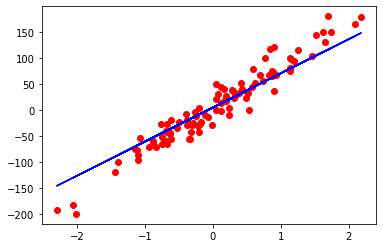

In [52]:
num_epochs=100
for epoch in range(num_epochs):
  #forward pass
  y_predicted = model(X)
  loss=criterion(y_predicted, y)

  #backward pass
  loss.backward()

  #update
  optimizer.step()

  #empty gradients
  optimizer.zero_grad()

  #print some info every tenth epoch
  if (epoch +1)%10 ==0:
    print(f"epoch: {epoch + 1}, loss= {loss.item():.3f}") #cut at 3 decimal values
  

#plot values:
predicted=model(X).detach().numpy() #must detach as this tensor has gradients set to true
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted,"b")
plt.show()

#Logistic regression

this is an example of a logistic regression model in pytorch

step 1) load and prerpare the data

In [73]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [74]:
breast_cancer=datasets.load_breast_cancer()
X,y=breast_cancer.data,breast_cancer.target

In [75]:
n_sampless, n_features=X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1234)

In [76]:
#scale data
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

# convert to torch tensors:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [77]:
#reshape y
y_train = y_train.view(y_train.shape[0],1) #want to make y into a column, vector
y_test =y_test.view(y_test.shape[0],1)

prepare the model using the logistic regression function

In [78]:
class LogisticRegression(nn.Module):

  def __init__(self,input_features):
    super(LogisticRegression, self).__init__()
    self.linear=nn.Linear(input_features,1)

  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

#instantiate an instance of the model
model=LogisticRegression(n_features)

define optimizer and loss functions

In [79]:
criterion = nn.BCELoss() #binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


main training loop:

In [80]:
num_epochs=100

for epoch in range(num_epochs):
  #forward pass
  y_predicted=model(X_train)
  loss=criterion(y_predicted,y_train)
  #backward pass
  loss.backward()

  #update weights
  optimizer.step()

  #empty weights
  optimizer.zero_grad()

  #print info:
  if (epoch + 1) %10 ==0:
    print(f"epoch: {epoch + 1}, loss= {loss.item():.3f}") #cut at 3 decimal values


epoch: 10, loss= 0.691
epoch: 20, loss= 0.539
epoch: 30, loss= 0.451
epoch: 40, loss= 0.394
epoch: 50, loss= 0.354
epoch: 60, loss= 0.324
epoch: 70, loss= 0.300
epoch: 80, loss= 0.281
epoch: 90, loss= 0.266
epoch: 100, loss= 0.252


evaluate performance of model

In [81]:
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  accuracy=y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'accuracy: {accuracy: .3f}')

accuracy:  0.886


#Pytorch Datatests and DataLoader Classes

going over some terminology: 

epoch: 1 forward and backward pass of ALL training samples

batch_size: number of training samples in one forward and backward pass

number of iterations: number of apsses, each pass using [batch_size] number of samples




In [82]:
#import needed modules
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math


start implementing our own custom dataset:

In [119]:
class WineDataset(Dataset):

  def __init__(self):
    #data loading
    xy=np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv', 
                  delimiter=',',dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:,1:])
    self.y=torch.from_numpy(xy[:,[0]]) #n_samples, 1
    self.n_samples =xy.shape[0]

  def __getitem__(self, index):
    #allows you to get data by the index
    #dataset[0]
    return self.x[index], self.y[index]
  
  def __len__(self):
    #get len of dataset
    return self.n_samples
  

In [93]:
#get dataset:
dataset=WineDataset()
first_data=dataset[0]
features, labels=first_data
print(features,labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


this is how we get a dataset. Now let's see how we use a dataloader

In [96]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [98]:
dataiter=iter(dataloader)
data = dataiter.next()
features,labels=data
print(features, labels)

tensor([[1.2880e+01, 2.9900e+00, 2.4000e+00, 2.0000e+01, 1.0400e+02, 1.3000e+00,
         1.2200e+00, 2.4000e-01, 8.3000e-01, 5.4000e+00, 7.4000e-01, 1.4200e+00,
         5.3000e+02],
        [1.4060e+01, 1.6300e+00, 2.2800e+00, 1.6000e+01, 1.2600e+02, 3.0000e+00,
         3.1700e+00, 2.4000e-01, 2.1000e+00, 5.6500e+00, 1.0900e+00, 3.7100e+00,
         7.8000e+02],
        [1.2200e+01, 3.0300e+00, 2.3200e+00, 1.9000e+01, 9.6000e+01, 1.2500e+00,
         4.9000e-01, 4.0000e-01, 7.3000e-01, 5.5000e+00, 6.6000e-01, 1.8300e+00,
         5.1000e+02],
        [1.3360e+01, 2.5600e+00, 2.3500e+00, 2.0000e+01, 8.9000e+01, 1.4000e+00,
         5.0000e-01, 3.7000e-01, 6.4000e-01, 5.6000e+00, 7.0000e-01, 2.4700e+00,
         7.8000e+02]]) tensor([[3.],
        [1.],
        [3.],
        [3.]])


In [104]:
#iterate over whole data loader
#training loop:
num_epochs=2
total_samples=len(dataset)
n_iterations= math.ceil(total_samples/4)
print(total_samples, n_iterations)

178 45


In [105]:
#dummy training loop:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    #forward and backward pass, update weights
    if (i+1)%5 ==0:
      print(f"epoch {epoch+1}/{num_epochs}, step{i+1}/{n_iterations},inputs={inputs.shape}")

epoch 1/2, step5/45,inputs=torch.Size([4, 13])
epoch 1/2, step10/45,inputs=torch.Size([4, 13])
epoch 1/2, step15/45,inputs=torch.Size([4, 13])
epoch 1/2, step20/45,inputs=torch.Size([4, 13])
epoch 1/2, step25/45,inputs=torch.Size([4, 13])
epoch 1/2, step30/45,inputs=torch.Size([4, 13])
epoch 1/2, step35/45,inputs=torch.Size([4, 13])
epoch 1/2, step40/45,inputs=torch.Size([4, 13])
epoch 1/2, step45/45,inputs=torch.Size([2, 13])
epoch 2/2, step5/45,inputs=torch.Size([4, 13])
epoch 2/2, step10/45,inputs=torch.Size([4, 13])
epoch 2/2, step15/45,inputs=torch.Size([4, 13])
epoch 2/2, step20/45,inputs=torch.Size([4, 13])
epoch 2/2, step25/45,inputs=torch.Size([4, 13])
epoch 2/2, step30/45,inputs=torch.Size([4, 13])
epoch 2/2, step35/45,inputs=torch.Size([4, 13])
epoch 2/2, step40/45,inputs=torch.Size([4, 13])
epoch 2/2, step45/45,inputs=torch.Size([2, 13])


#Dataset Transforms!

we will see how to write a custom class to transform our data

Gathering data and code from the previous section, we can skip transforming X and Y in tensors and write separate methods especially for that:



In [120]:
class ToTensor:

  """A class that handles data transformations into tensors"""

  def __call__(self, sample):
    """This special dunder method makes this a callable object"""
    inputs,targets=sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)


We need to modify the dataclass to use this transform class.

To do this, add a parameter "transform" in its init method and eliminate the .from_numpy method:


In [134]:
class WineDataset(Dataset):

  def __init__(self, transform=None):#added transform parameter
    #data loading
    xy=np.loadtxt('https://raw.githubusercontent.com/python-engineer/pytorchTutorial/master/data/wine/wine.csv', 
                  delimiter=',',dtype=np.float32, skiprows=1)
    self.x = xy[:,1:]#modified here
    self.y=xy[:,[0]] # and here n_samples, 1
    self.n_samples =xy.shape[0]
    self.transform=transform

  def __getitem__(self, index):
    #allows you to get data by the index
    #dataset[0]
    sample=self.x[index], self.y[index] #apply the transformation
    if self.transform:
      sample=self.transform(sample)
      return sample
  
  def __len__(self):
    #get len of dataset
    return self.n_samples
  

In [136]:
#apply this transoformation to our dataset
dataset = WineDataset(transform=ToTensor())

In [137]:
first_data=dataset[0]
features, labels=first_data
print(type(features), type(labels)) #data has been transformed into a tensor

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [139]:
dataset = WineDataset(transform=None)
first_data=dataset[0]
features, labels=first_data
print(type(features), type(labels))#if we don't pass this optional parameter our data is still in the shape of a numpy array

TypeError: ignored

lets try implementing a new class:


In [140]:
class MulTransform:
  """Multiplication transform"""

  def __init__(self, factor):
    self.factor=factor

  
  def __call__(self, sample):
    """This special dunder method makes this a callable object"""
    inputs,target=sample
    inputs *= self.factor #multiplication transform
    return inputs, target
    

In [144]:
#apply this new transform


#compose to transforms together by using the compose method and putting them into a list
composed= torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)

first_data=dataset[0]
features, labels=first_data
print(type(features), type(labels))
print(features)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])


#Softmax and crossentropy

useful concept to preproces images, like turning them into gray scale and preprocessing them

In [145]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x),axis=0)

x=np.array([2.0,1.0, 0.1])
outputs=softmax(x)
print('softmax  numpy', outputs)

softmax  numpy [0.65900114 0.24243297 0.09856589]


In [146]:
x=torch.tensor([2.0, 1.0, 0.1])
outputs=torch.softmax(x, dim=0)
print(outputs)#reuslt is almost the same

tensor([0.6590, 0.2424, 0.0986])


In [150]:
def cross_entropy(actual, predicted):
  loss=-np.sum(actual * np.log(predicted))
  return loss

In [151]:
#y must be one hot encoded
y=np.array([1,0,0])

Y_pred_good=np.array([0.7, 0.2, 0.1])
Y_pred_bad=np.array([0.1, 0.3, 0.6])
l1=cross_entropy(y, Y_pred_good)
l2=cross_entropy(y, Y_pred_bad)
print(f"Loss1 numpy:{l1: 4f}")
print(f"Loss2 numpy:{l2: 4f}")

Loss1 numpy: 0.356675
Loss2 numpy: 2.302585


lets see how we can do this in pytorch

In [152]:
loss=nn.CrossEntropyLoss()
#Y no softmax in last layer, y_class has labels so no One hot encode!
#Y_pred has raw scores (logits) no softmax!

In [155]:
Y=torch.tensor([0])
#n samples x nlcasses
Y_pred_good=torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad=torch.tensor([[0.5, 3.0, 0.3]])

In [156]:
l1=loss(Y_pred_good,Y)
l2=loss(Y_pred_bad,Y)

In [157]:
print(l1.item(), l2.item())

0.4170299470424652 2.6391448974609375


In [158]:
_,predictions1=torch.max(Y_pred_good,1)
_,predictions2=torch.max(Y_pred_bad,1)
print(predictions1, predictions2)

tensor([0]) tensor([1])


simple template on how to create an image classifier model with crossentropy:

In [160]:
#Multiclass problems:
class NeuralNet2(nn.Module):
  
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2=nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out=self.linear(x)
    out=self.relu(out)
    out=self.linear2(out)
    #no softmax at the end
    return out

model=NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion=nn.CrossEntropyLoss() #applies softmax

Activation functions in Pytorch